In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
# importing data
heights=pd.read_csv('/Users/hlind/Downloads/heights 2.csv')

In [3]:
heights.head()

,AM_Height,PM_Height
0,1728.75,1720.25
1,1538.25,1528.50
2,1462.25,1452.50
3,1782.50,1776.50
4,1671.00,1667.00


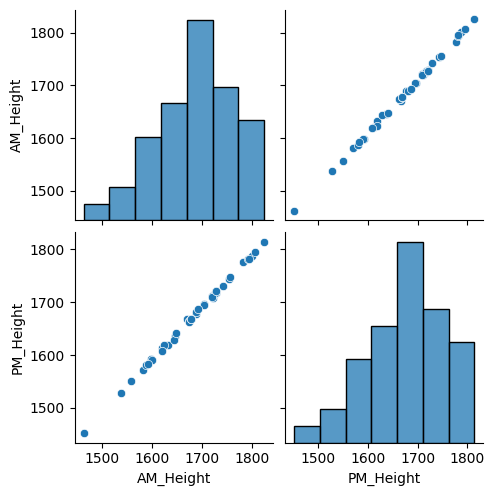

In [4]:
# checking for linear regression
sns.pairplot(heights)

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_74280/4042702402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights['AM_Height'])


<AxesSubplot: xlabel='AM_Height', ylabel='Density'>

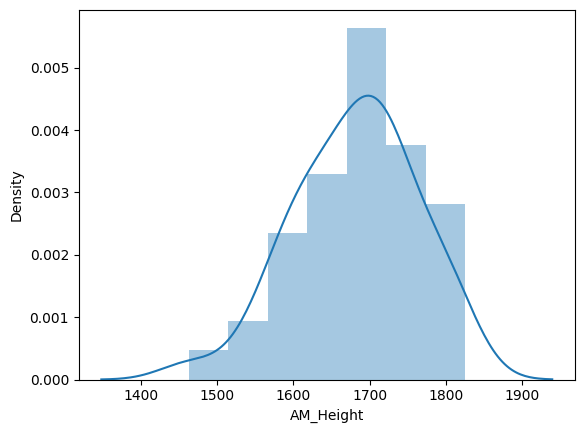

In [5]:
# plotting histogram with bell curve - AM heights
sns.distplot(heights['AM_Height'])

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_74280/979740555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights['PM_Height'])


<AxesSubplot: xlabel='PM_Height', ylabel='Density'>

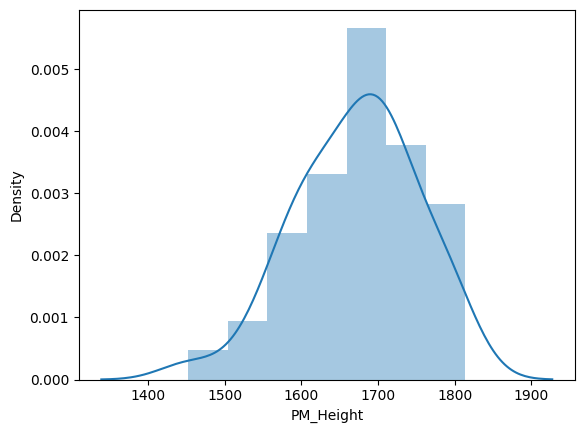

In [7]:
# looks to be normally distributed
## plotting histogram - PM heights
sns.distplot(heights['PM_Height'])

In [8]:
# looks to be normally distributed
## assigning variables
x=heights['AM_Height']
y=heights['PM_Height']

In [9]:
# building model
heightsMod=sm.OLS(y,x).fit()

In [10]:
predVal=heightsMod.fittedvalues.copy()
trueVal=heights['PM_Height'].values.copy()
residual=trueVal-predVal

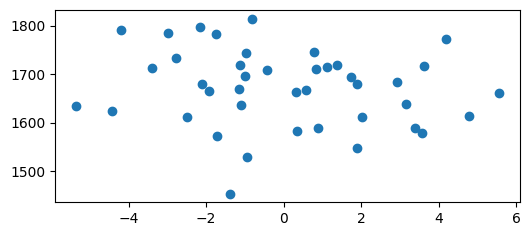

In [11]:
fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(residual, predVal)

In [13]:
# breusch test
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.28180780859512, nan, 29.14523614469704, 3.3000372410793505e-06)

In [14]:
# pvalue <.05 - assumption not met
## harvey test
sms.linear_harvey_collier(heightsMod)

TtestResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713, df=37)

In [15]:
# pvalue >.05 - assumption met
## boxcox transformation
transformed, _=boxcox(heights['AM_Height'])

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

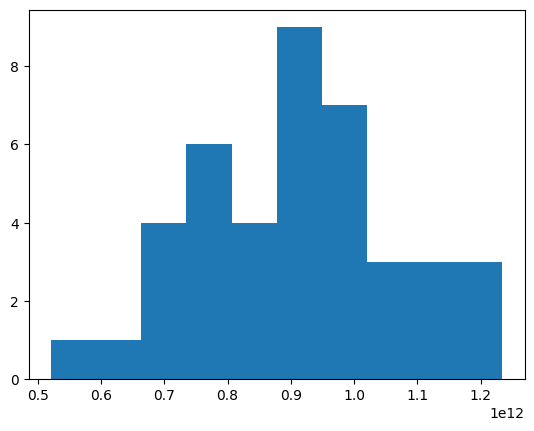

In [16]:
# plotting transformed
plt.hist(transformed)

In [17]:
# re-testing
x=transformed
model1=sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2347.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    3.84e-37
Time:                        18:47:07   Log-Likelihood:                         -278.68
No. Observations:                  41   AIC:                                      559.4
Df Residuals:                      40   BIC:                                      561.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            1.8e-09   3.71e-11     48.450      0.000    1.72e-09    1.87e-09
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.516
Skew:                          -0.105   Prob(JB):                        0.773
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# new residual values
predVal=model1.fittedvalues.copy()
trueVal=heights['PM_Height'].values.copy()
residual=trueVal-predVal

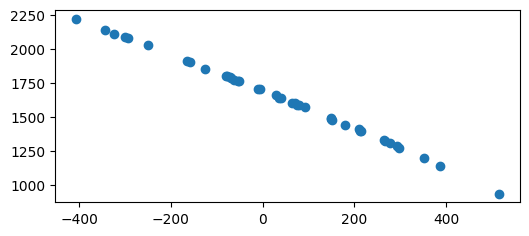

In [19]:
# replotting
fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(residual, predVal)

In [20]:
# testing for multicollinearity
heights.corr()

,AM_Height,PM_Height
AM_Height,1.000000,0.999466
PM_Height,0.999466,1.000000


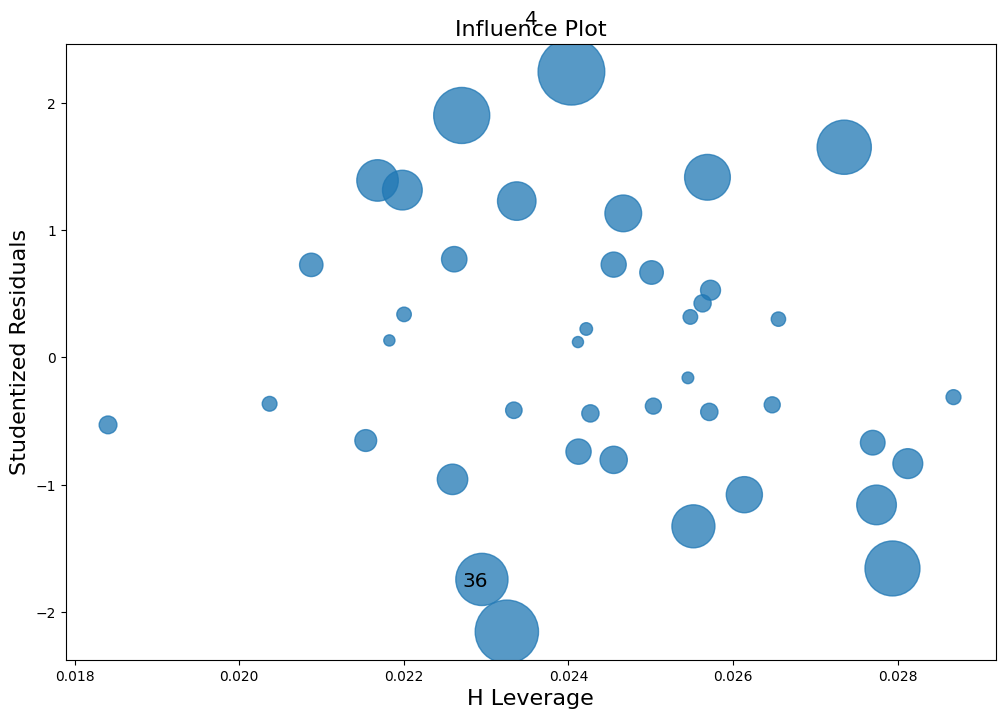

In [22]:
# screening for outliers
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(heightsMod, alpha=.05, ax=ax, criterion="cooks")

In [23]:
# 36 is the outlier
## double checking outliers
infl=heightsMod.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.085810  0.007499        0.532882  0.025727         0.086594   
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

In [24]:
# outlier problem in student_resid column
## dropping row 36 to retry
heights.drop(heights.index[36], inplace=True)

In [25]:
# reassigning values
x=heights['AM_Height']
y=heights['PM_Height']

In [26]:
# new model
newHeights=sm.OLS(y,x).fit()

In [27]:
newHeights.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.774e+07
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                   5.93e-112
Time:                        18:57:41   Log-Likelihood:                         -93.134
No. Observations:                  40   AIC:                                      188.3
Df Residuals:                      39   BIC:                                      190.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9944      0.000   4212.277      0.000       0.994       0.995
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.295
Skew:                           0.247   Prob(JB):                        0.523
Kurtosis:                       2.270   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# in comparison, they look to have few differences